In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/data_clean.csv')
df.head()

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,NaN,puple,boots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,NaN,boots,jacket,leggings,shirt,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,NaN,hat,bag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
location = df.groupby('loc')
location.describe().head()
location['loc'].nunique().count()

3150

In [4]:
user = df.groupby('names')
user.describe().head()


Unnamed: 0                                                   \
                   count           mean           std      min        25%   
names                                                                       
000ecstaSY000        3.0   48560.333333  84108.098542      0.0       0.50   
0011zm              24.0   91057.250000  72044.899697      2.0       7.75   
01foreverlove      297.0  137512.838384  76864.670056   3878.0   56644.00   
08willsters         30.0  168204.266667  67064.560473  43510.0  122435.00   
0910beh             30.0   72862.500000  74086.744179     14.0      21.25   

                                              
                    50%        75%       max  
names                                         
000ecstaSY000       1.0   72840.50  145680.0  
0011zm         145683.5  145689.25  145695.0  
01foreverlove  158954.0  188912.00  282191.0  
08willsters    168086.5  217388.50  273064.0  
0910beh         72862.5  145703.75  145711.0

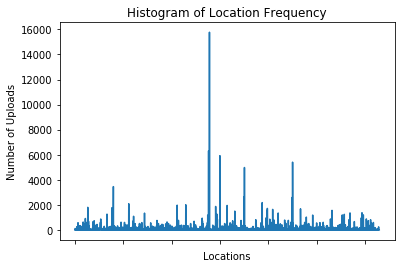

15771
('Los Angeles, CA', 'Los Angeles, CA')


In [5]:
location['loc'].value_counts().plot()
plt.xticks(rotation = 45)
plt.xlabel('Locations')
plt.ylabel('Number of Uploads')
plt.title('Histogram of Location Frequency')
plt.show()
print(location['loc'].value_counts().max())
print(location['loc'].value_counts().idxmax())

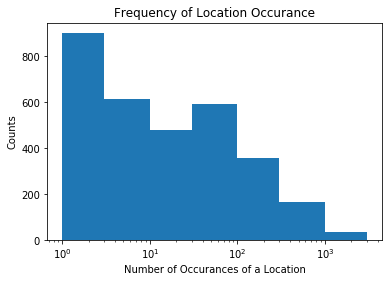

11.5

In [6]:
#number of users in each bin of uploads
from collections import Counter

locations = df['loc'].tolist()
vals = Counter(locations)
plt.hist(vals.values(), bins = [0,1,3,10,30,100,300,1000,3000])
plt.xscale('log')
plt.xlabel("Number of Occurances of a Location")
plt.ylabel("Counts")
plt.title("Frequency of Location Occurance")
plt.show()

np.median(list(vals.values()))

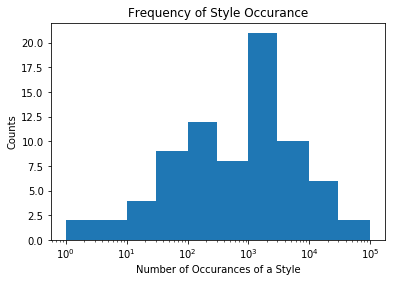

1123.5

In [7]:
styles = df['style_0'].tolist()
vals = Counter(styles)
plt.hist(vals.values(), bins = [0,1,3,10,30,100,300,1000,3000,10000, 30000,100000])
plt.xscale('log')
plt.xlabel("Number of Occurances of a Style")
plt.ylabel("Counts")
plt.title("Frequency of Style Occurance")
plt.show()

np.median(list(vals.values()))

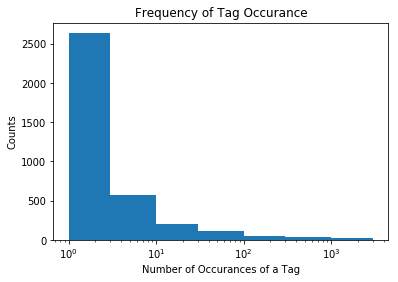

1.0

In [8]:
tags = df['tags_0'].tolist()
vals = Counter(tags)
plt.hist(vals.values(), bins = [0,1,3,10,30,100,300,1000,3000])
plt.xscale('log')
plt.xlabel("Number of Occurances of a Tag")
plt.ylabel("Counts")
plt.title("Frequency of Tag Occurance")
plt.show()

np.median(list(vals.values()))

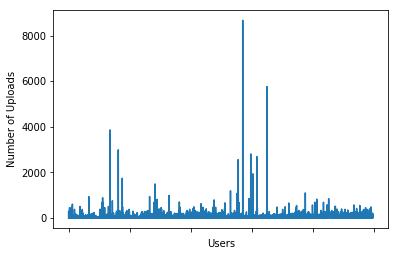

8672
('amelie240', 'amelie240')


In [9]:
user['names'].value_counts().plot()
plt.xticks(rotation = 45)
plt.xlabel('Users')
plt.ylabel('Number of Uploads')
plt.show()
print(user['names'].value_counts().max())
print(user['names'].value_counts().idxmax())

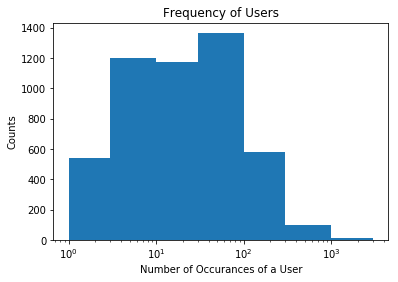

20.0

In [10]:
users = df['names'].tolist()
vals = Counter(users)
plt.hist(vals.values(), bins = [0,1,3,10,30,100,300,1000,3000])
plt.xscale('log')
plt.xlabel("Number of Occurances of a User")
plt.ylabel("Counts")
plt.title("Frequency of Users")
plt.show()

np.median(list(vals.values()))

In [11]:
wordsStyles = ' '
for index, row in df.iterrows():
    word0 = row['style_0']
    if (word0 != None) and ('nan' not in str(word0)):
        wordsStyles = wordsStyles + str(word0) + ' '
    word1 = row['style_1']
    if (word1 != None) and ('nan' not in str(word1)):
        wordsStyles = wordsStyles + str(word1) + ' '
    word2 = row['style_2']
    if (word2 != None) and ('nan' not in str(word2)):
        wordsStyles = wordsStyles + str(word2) + ' '
        
wordcloudStyles = WordCloud(width = 800, height = 800, 
                background_color ='black', collocations = False).generate(wordsStyles)


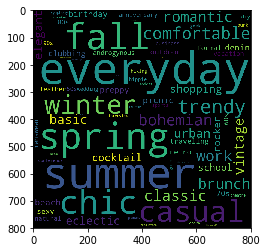

In [12]:
plt.imshow(wordcloudStyles)
plt.show()

In [13]:
#histogram of word frequencies

{'urban': 8473, 'winter': 34317, 'work': 11992, 'casual': 44655, 'eclectic': 7637, 'classic': 11817, 'fall': 68136, 'bohemian': 12219, 'chic': 55965, 'shopping': 6924, 'summer': 103818, 'vintage': 10126, 'spring': 69218, 'elegant': 8248, 'brunch': 11219, 'comfortable': 13852, 'basic': 9090, 'romantic': 11505, 'everyday': 108436, 'trendy': 15937}


Text(0.5,1,'Most Popular Styles')

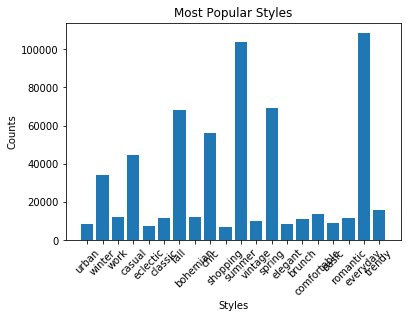

In [14]:
from collections import Counter

styleCounts = dict(Counter(wordsStyles.split()).most_common(20))
print(styleCounts)
styleUnique, styleCounts = zip(*styleCounts.items())

plt.bar(styleUnique, styleCounts)
plt.xticks(styleUnique, rotation = 45)
plt.xlabel("Styles")
plt.ylabel("Counts")
plt.title("Most Popular Styles")

In [16]:
styleCountsTotal = dict(Counter(wordsStyles.split()))

frequentStyles = []
for key in styleCountsTotal:
    if styleCountsTotal[key] > 100:
        frequentStyles.append(key)

frequentStyles.remove('chictopia10')
#frequentTags.remove('1490')
#frequentTags.remove('fit')
#frequentTags.remove('lita')
#frequentTags.remove('hm')
#frequentTags.remove('summer')
#frequentTags.remove('casual')
#frequentTags.remove('litas')
#frequentTags.remove('www.ebaystores.com/bonjourvintage')
#frequentTags.remove('diy')
print(len(frequentStyles))
print(frequentStyles)

68
['runway', 'bohemian', 'vintage', 'maternity', 'everyday', 'birthday', 'urban', 'classic', 'conference', 'chic', 'spring', 'romantic', 'diy', 'menswear', 'springtime', 'retro', 'sports', 'leather', 'sneaker', 'interview', 'internship', 'cocktail', 'picnic', 'beach', 'eclectic', 'business', '80s', 'other', 'natural', '70s', 'casual', 'school', 'gym', 'elegant', 'traveling', 'modest', 'preppy', 'goth', 'sexy', 'hippie', 'fall', 'prom', 'formal', 'punk', 'summer', 'vacation', 'theatre/opera/symphony', 'rocker', '60s', 'trendy', 'grandma', 'work', 'shopping', 'anniversary', 'winter', 'clubbing', 'comfortable', 'geek', 'hiking', 'androgynous', 'wedding', 'outdoor', '90s', 'denim', 'brunch', 'basic', 'graduation', '50s']


In [17]:
df = df.fillna(0)
for index, row in df.iterrows():
    word0 = row['style_0']
    word1 = row['style_1']
    word2 = row['style_2']
    if (str(word0) not in frequentStyles):
        df.at[index, 'style_0'] = None
    if (str(word1) not in frequentStyles):
        df.at[index, 'style_1'] = None
    if (str(word2) not in frequentStyles):
        df.at[index, 'style_2'] = None
        

In [18]:
df.head()

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,None,puple,boots,0,0,0,0,0,0,0,0
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,0,0,0,0,0,0,0,0
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,None,boots,jacket,leggings,shirt,0,0,0,0,0,0
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,None,hat,bag,0,0,0,0,0,0,0,0
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,0,0,0,0,0,0,0


In [19]:

styleCounts = [df['style_0'].count(), df['style_1'].count(), df['style_2'].count()]
styleCounts

[275172, 271044, 174934]

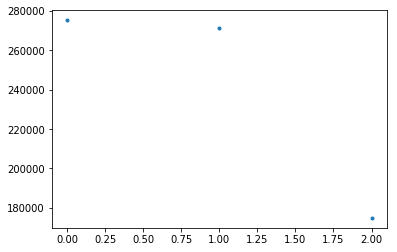

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,None,puple,boots,0,0,0,0,0,0,0,0
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,0,0,0,0,0,0,0,0
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,None,boots,jacket,leggings,shirt,0,0,0,0,0,0
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,None,hat,bag,0,0,0,0,0,0,0,0
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,0,0,0,0,0,0,0


In [20]:
plt.plot(styleCounts, linestyle='', marker='.')
plt.show()

df.head()

In [21]:
#time data - look at range of dates
#plot dates against word frequencies over time
#word cloud changing by year?
print(df['time'].min())
print(df['time'].max())

2008-03-02
2015-12-15


In [22]:
#create dataframes for each year:
data_2008 = df[(df['time'] < '2009-01-01')]
data_2009 = df[(df['time'] >= '2009-01-01') & (df['time'] < '2010-01-01')]
data_2010 = df[(df['time'] >= '2010-01-01') & (df['time'] < '2011-01-01')]
data_2011 = df[(df['time'] >= '2011-01-01') & (df['time'] < '2012-01-01')]
data_2012 = df[(df['time'] >= '2012-01-01') & (df['time'] < '2013-01-01')]
data_2013 = df[(df['time'] >= '2013-01-01') & (df['time'] < '2014-01-01')]
data_2014 = df[(df['time'] >= '2014-01-01') & (df['time'] < '2015-01-01')]
data_2015 = df[(df['time'] >= '2015-01-01')]




([<matplotlib.axis.XTick at 0x7f4343c6f748>,
 <a list of 8 Text xticklabel objects>)

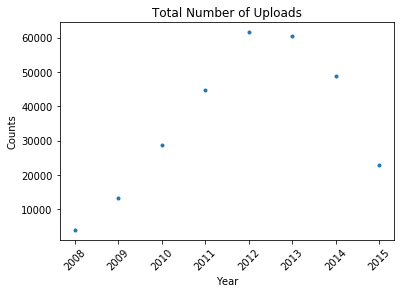

In [23]:
entries = [data_2008['names'].count(), data_2009['names'].count(), data_2010['names'].count()
          , data_2011['names'].count(), data_2012['names'].count(), data_2013['names'].count()
          , data_2014['names'].count(), data_2015['names'].count()]

plt.plot(entries, linestyle = '', marker = '.')
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title("Total Number of Uploads")
plt.xticks([0,1,2,3,4,5,6,7], [2008,2009,2010,2011,2012,2013,2014,2015], rotation = 45)

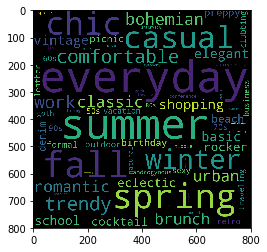

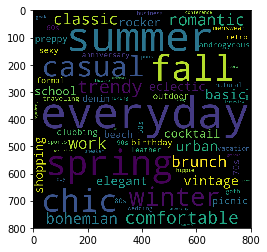

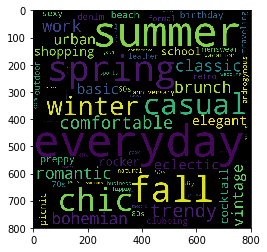

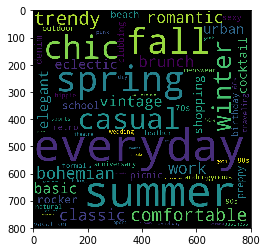

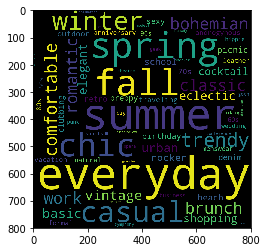

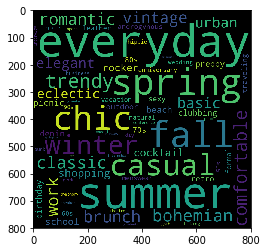

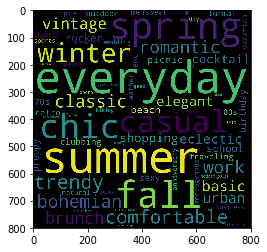

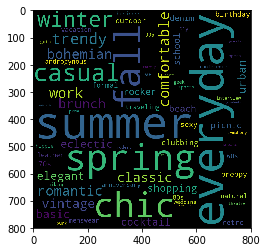

In [24]:
def styleWordCloud(dataframe):
    styleWords = ' '
    for index, row in dataframe.iterrows():
        word0 = row['style_0']
        if (word0 != None) and ('nan' not in str(word0)):
            styleWords = styleWords + str(word0) + ' '
        word1 = row['style_1']
        if (word1 != None) and ('nan' not in str(word1)):
            styleWords = styleWords + str(word1) + ' '
        word2 = row['style_2']
        if (word2 != None) and ('nan' not in str(word2)):
            styleWords = styleWords + str(word2) + ' '
    
    wcStyles = WordCloud(width = 800, height = 800, 
                background_color ='black', collocations = False).generate(styleWords)
    plt.imshow(wcStyles)
    plt.show()
    return styleWords


def plotWordFreq(words):
    styleCounts = dict(Counter(words.split()).most_common(20))
    styleUnique, styleCounts = zip(*styleCounts.items())
    plt.bar(styleUnique, styleCounts)
    plt.xticks(styleUnique, rotation = 45)
    plt.xlabel("Styles")
    plt.ylabel("Counts")
    plt.title("Most Common Styles")
    plt.show()
    return styleUnique, styleCounts
   
styles2008 = styleWordCloud(data_2008)    
styles2009 = styleWordCloud(data_2009)    
styles2010 = styleWordCloud(data_2010)    
styles2011 = styleWordCloud(data_2011)    
styles2012 = styleWordCloud(data_2012)    
styles2013 = styleWordCloud(data_2013)    
styles2014 = styleWordCloud(data_2014)    
styles2015 = styleWordCloud(data_2015)    



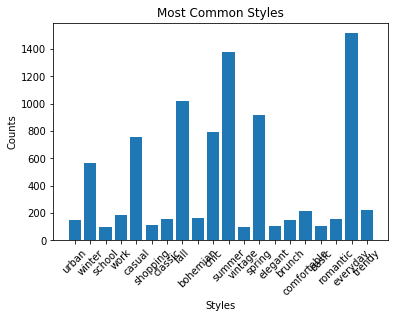

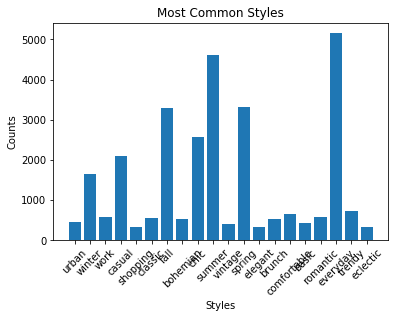

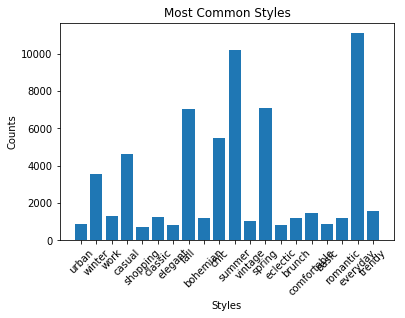

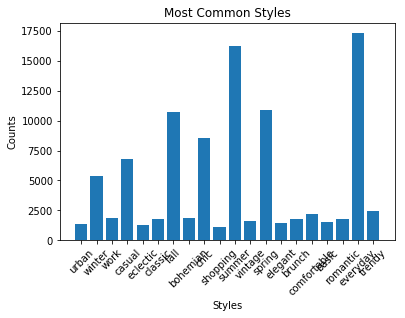

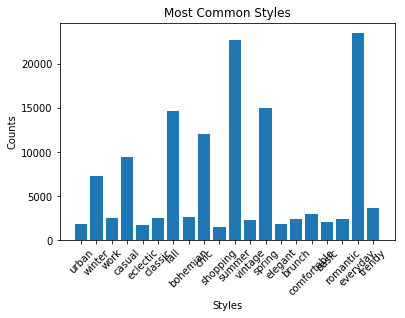

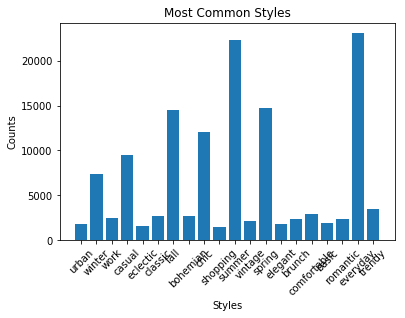

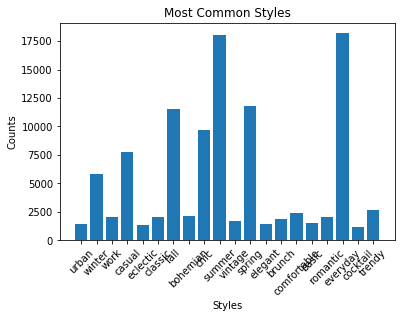

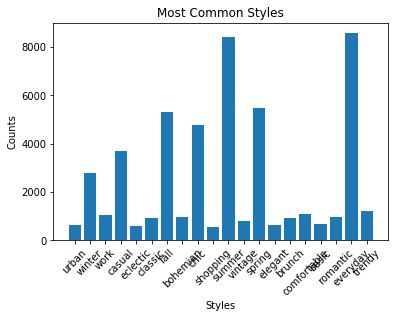

In [25]:
unique2008, freq2008 = plotWordFreq(styles2008)
unique2009, freq2009 = plotWordFreq(styles2009)
unique2010, freq2010 = plotWordFreq(styles2010)
unique2011, freq2011 = plotWordFreq(styles2011)
unique2012, freq2012 = plotWordFreq(styles2012)
unique2013, freq2013 = plotWordFreq(styles2013)
unique2014, freq2014 = plotWordFreq(styles2014)
unique2015, freq2015 = plotWordFreq(styles2015)
#use bokeh slider for this
#bokeh drop down menu to go between the different common words

In [26]:
yearlyFreqs = pd.DataFrame()
yearlyFreqs['2008'] = freq2008[0:10]
yearlyFreqs['2009'] = freq2009[0:10]
yearlyFreqs['2010'] = freq2010[0:10]
yearlyFreqs['2011'] = freq2011[0:10]
yearlyFreqs['2012'] = freq2012[0:10]
yearlyFreqs['2013'] = freq2013[0:10]
yearlyFreqs['2014'] = freq2014[0:10]
yearlyFreqs['2015'] = freq2015[0:10]
yearlyFreqs['labels'] = unique2008[0:10]

totals = []
for item, row in yearlyFreqs.iterrows():
    totals.append(row['2008']+row['2009']+row['2010']+row['2011']
    +row['2012']+row['2013']+row['2014']+row['2015'])

yearlyFreqs['totals'] = totals

yearlyFreqs

,2008,2009,2010,2011,2012,2013,2014,2015,labels,totals
0,149,445,886,1345,1801,1780,1433,634,urban,8473
1,566,1639,3550,5333,7308,7364,5789,2768,winter,34317
2,95,576,1283,1829,2560,2466,2045,1052,school,11906
3,181,2105,4622,6786,9466,9477,7755,3691,work,44083
4,753,320,712,1231,1706,1574,1295,599,casual,8190
5,111,552,1225,1777,2492,2652,2057,907,shopping,11773
6,155,3301,801,10744,14696,14478,11566,5319,classic,61060
7,1017,525,7015,1874,2669,2673,2166,945,fall,18884
8,166,2572,1201,8558,12045,12111,9651,4754,bohemian,51058
9,789,4611,5485,1065,1533,1498,17997,539,chic,33517


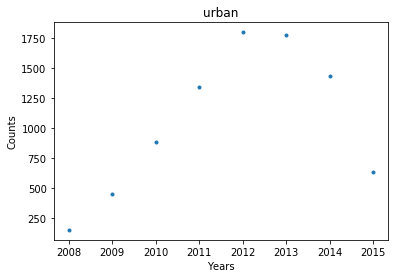

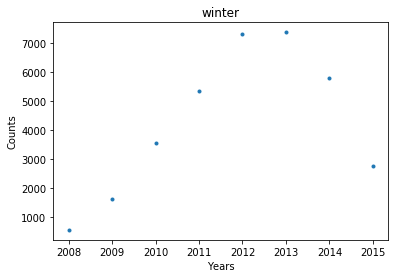

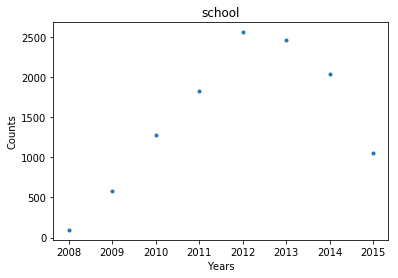

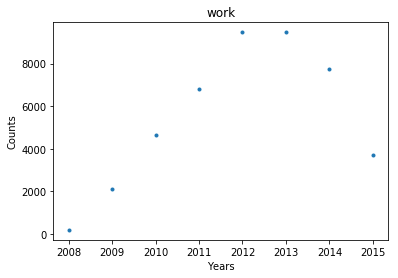

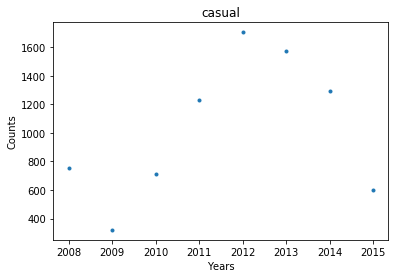

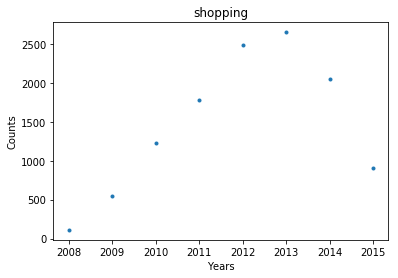

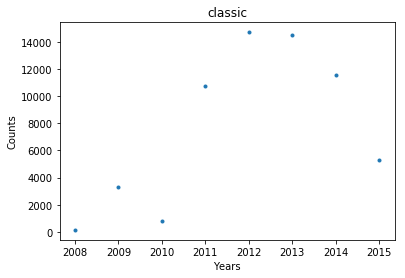

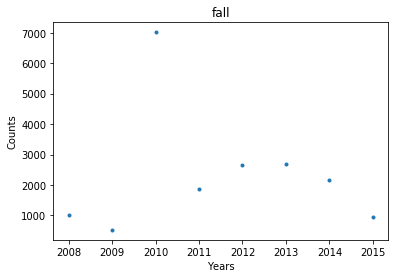

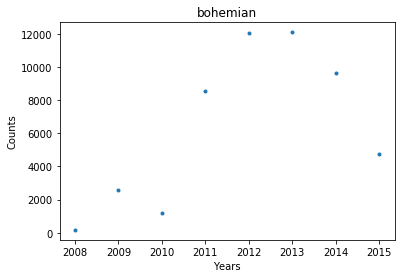

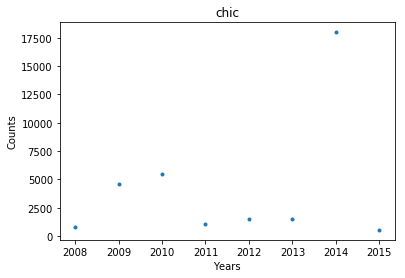

In [27]:
for i in range(0,10):
    plt.plot(yearlyFreqs.loc[i][0:8], linestyle = '', marker = '.')
    plt.title(yearlyFreqs.loc[i][8])
    plt.xlabel("Years")
    plt.ylabel("Counts") 
    plt.show()

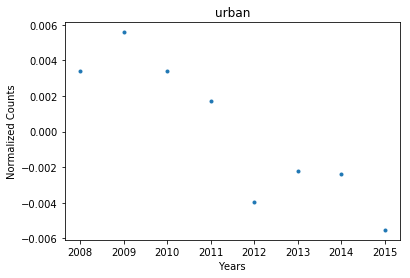

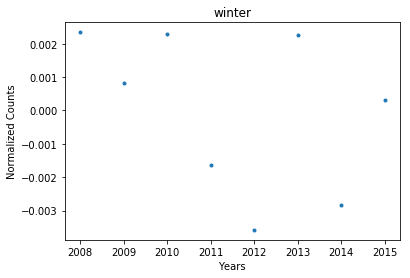

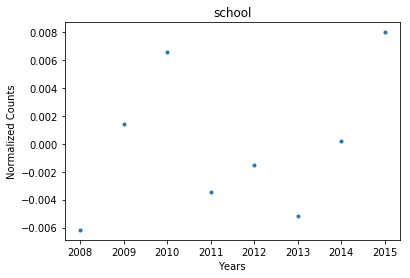

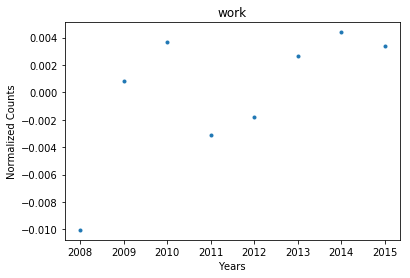

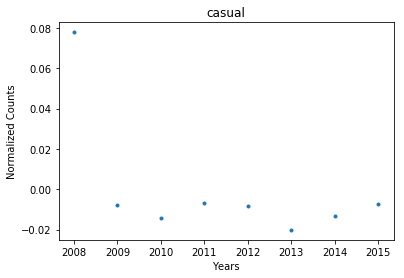

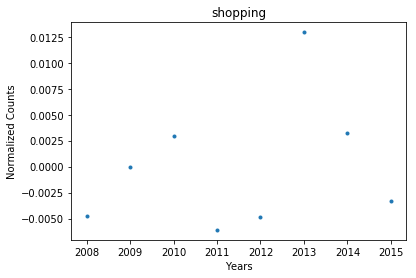

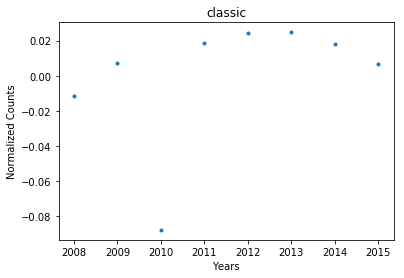

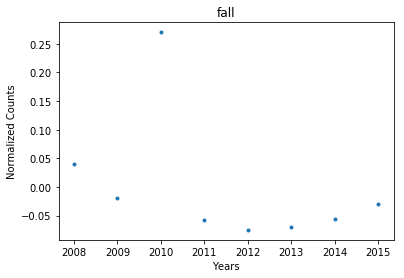

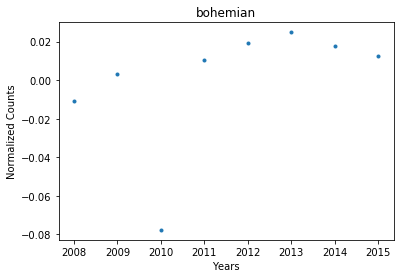

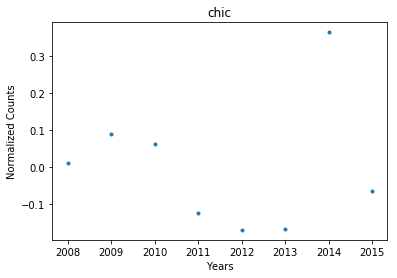

In [28]:
#subtract usage curve to normalize 
entriesNorm = entries/df['names'].count()

for i in range(0,10):
    plt.plot((yearlyFreqs.loc[i][0:8]/yearlyFreqs.loc[i][9]) - entriesNorm, linestyle = '', marker = '.')
    plt.title(yearlyFreqs.loc[i][8])
    plt.xlabel("Years")
    plt.ylabel("Normalized Counts")
    plt.show()

In [29]:
# plot word popularity by month
#split by months
def getStyles(dataframe):
    styleWords = ' '
    for index, row in dataframe.iterrows():
        word0 = row['style_0']
        if (word0 != None) and ('nan' not in str(word0)):
            styleWords = styleWords + str(word0) + ' '
        word1 = row['style_1']
        if (word1 != None) and ('nan' not in str(word1)):
            styleWords = styleWords + str(word1) + ' '
        word2 = row['style_2']
        if (word2 != None) and ('nan' not in str(word2)):
            styleWords = styleWords + str(word2) + ' '
    
    return styleWords

In [30]:
def getWordFreq(words):
    styleCounts = dict(Counter(words.split()).most_common(20))
    styleUnique, styleCounts = zip(*styleCounts.items())
    return styleUnique, styleCounts

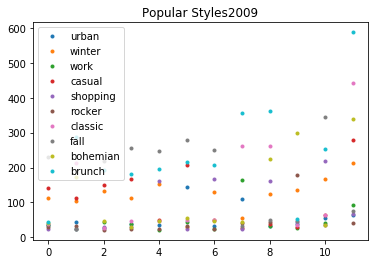

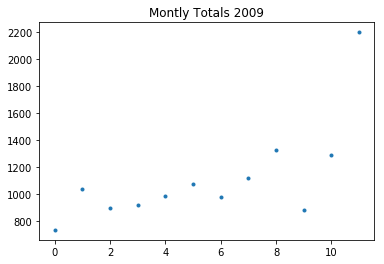

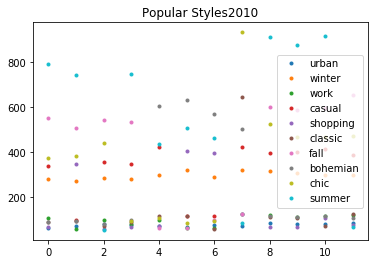

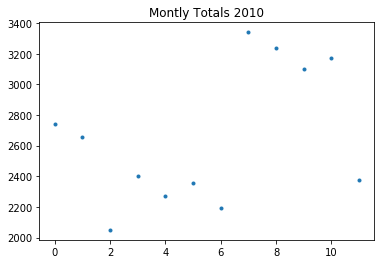

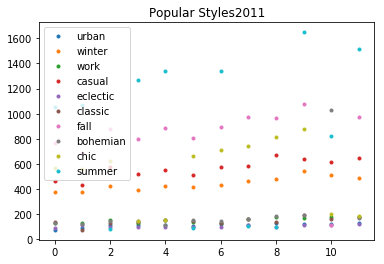

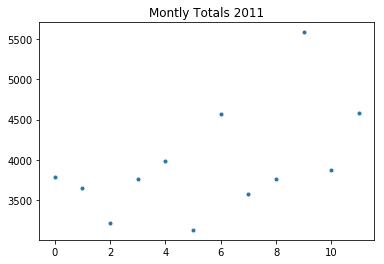

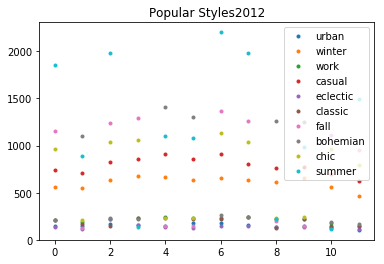

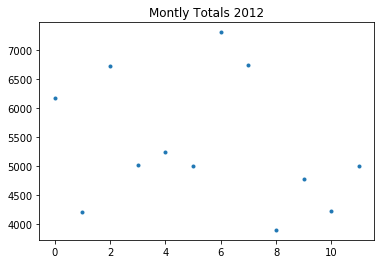

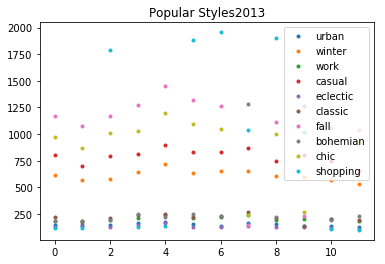

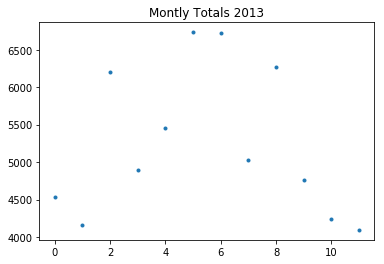

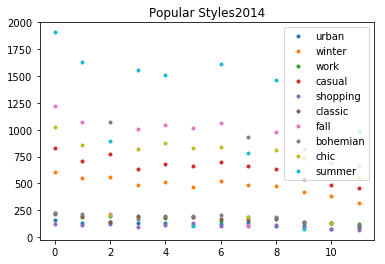

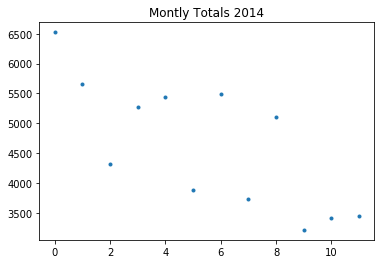

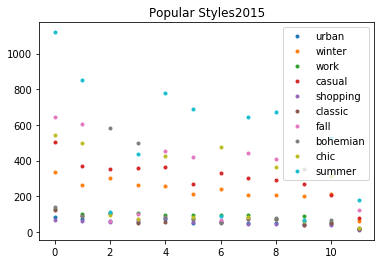

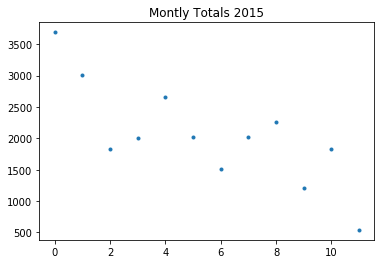

In [31]:
def plotMonths(yeardata, year):
    yeardata['time'] = pd.to_datetime(yeardata['time'])
    months = [g for n, g in yeardata.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months[i] = getStyles(months[i])
        
    months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles = [0,1,2,3,4,5,6,7,8,9,10,11]
    for i in range (0,12):
        months_Styles[i], months_Counts[i] = getWordFreq(months[i])
    
    months_Counts = np.array(months_Counts)
    months_Styles = np.array(months_Styles)
    cmap = plt.get_cmap('tab10')
    for i in range(0,10):
        plt.plot(months_Counts[0:12,i], linestyle = '', marker = '.', label = months_Styles[0,i], c = cmap(i))
    
    plt.title('Popular Styles' + year)
    plt.legend()
    plt.show()
    
    monthTotal = []
    for j in range(0,12):
        monthTotal.append(sum(months_Counts[j,0:10]))
    plt.plot(monthTotal, linestyle = '', marker = '.')
    plt.title('Montly Totals ' + year)
    plt.show()

plotMonths(data_2009, '2009')
plotMonths(data_2010, '2010')
plotMonths(data_2011, '2011')
plotMonths(data_2012, '2012')
plotMonths(data_2013, '2013')
plotMonths(data_2014, '2014')
plotMonths(data_2015, '2015')

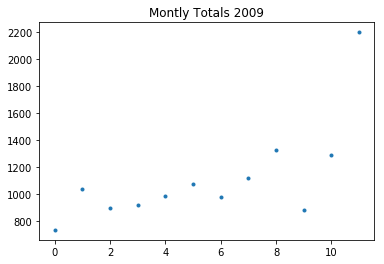

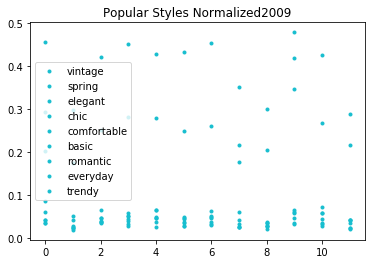

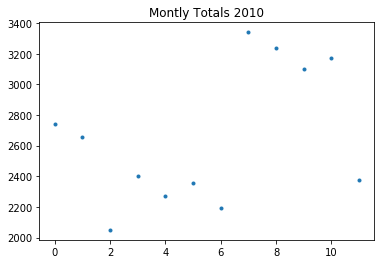

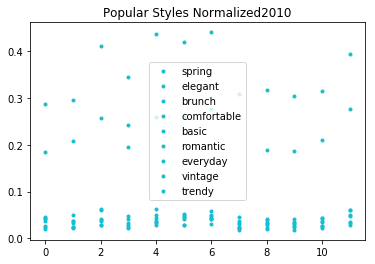

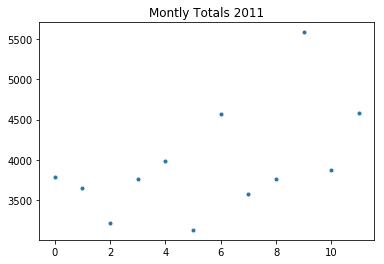

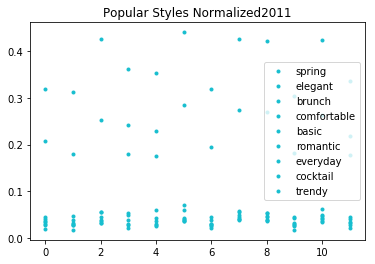

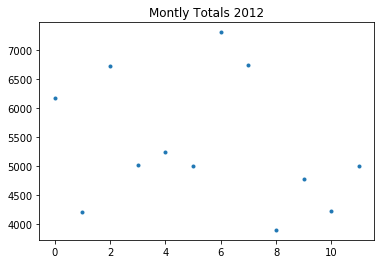

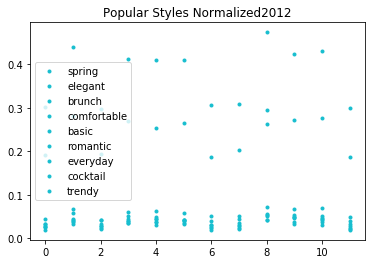

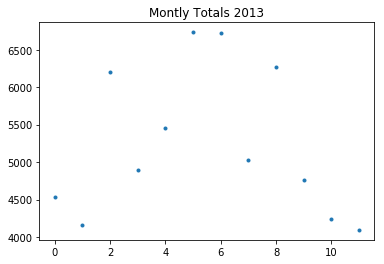

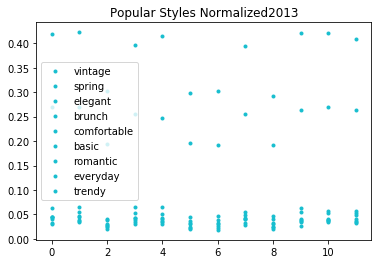

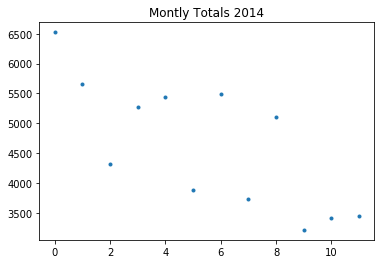

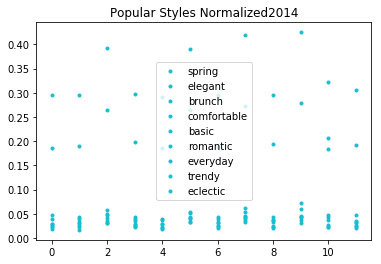

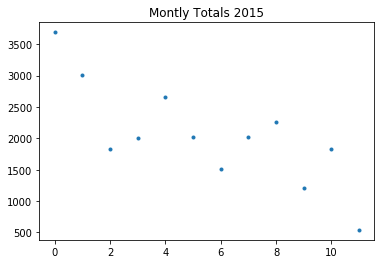

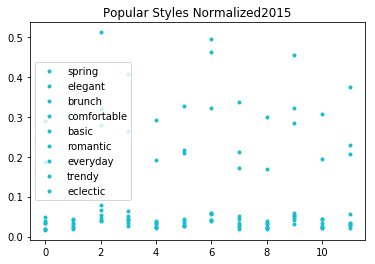

In [32]:
def plotMonthsNorm(yeardata, year):
    yeardata['time'] = pd.to_datetime(yeardata['time'])
    months = [g for n, g in yeardata.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months[i] = getStyles(months[i])
        
    months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles = [0,1,2,3,4,5,6,7,8,9,10,11]
    for i in range (0,12):
        months_Styles[i], months_Counts[i] = getWordFreq(months[i])
    
    months_Counts = np.array(months_Counts).astype(float)
    months_Styles = np.array(months_Styles)
    
    monthTotal = []
    for j in range(0,12):
        monthTotal.append(sum(months_Counts[j,0:10]))
    plt.plot(monthTotal, linestyle = '', marker = '.')
    plt.title('Montly Totals ' + year)
    plt.show()
    
    months_CountsNorm = months_Counts
    
    for i in range(0,12):
        for j in range(11,20):
            months_CountsNorm[i,j] = months_Counts[i,j]/monthTotal[i]
            
    cmap = plt.get_cmap('tab10')
    for i in range(11,20):
        plt.plot(months_CountsNorm[0:12,i], linestyle = '', marker = '.', label = months_Styles[0,i], c = cmap(i))
        
    plt.title('Popular Styles Normalized' + year)
    plt.legend()
    plt.show()
        
plotMonthsNorm(data_2009, '2009')
plotMonthsNorm(data_2010, '2010')
plotMonthsNorm(data_2011, '2011')
plotMonthsNorm(data_2012, '2012')
plotMonthsNorm(data_2013, '2013')
plotMonthsNorm(data_2014, '2014')
plotMonthsNorm(data_2015, '2015')

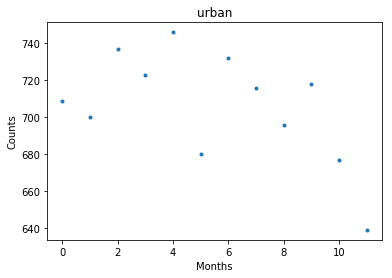

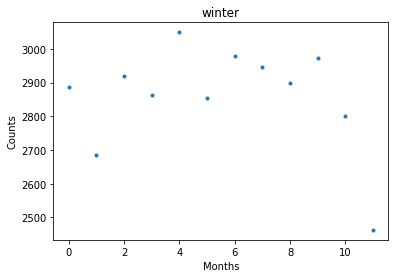

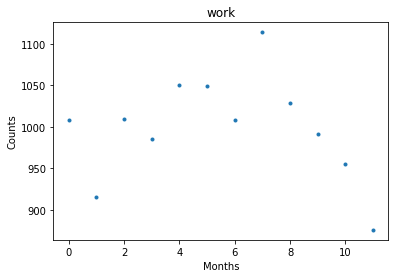

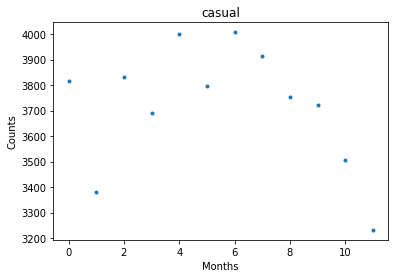

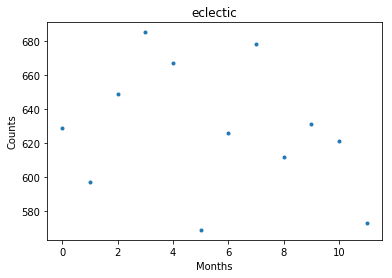

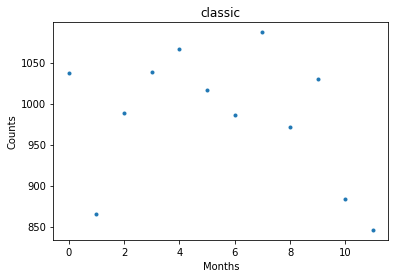

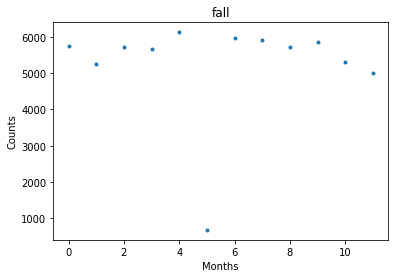

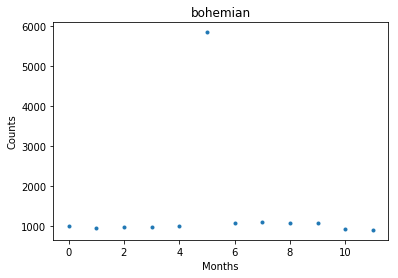

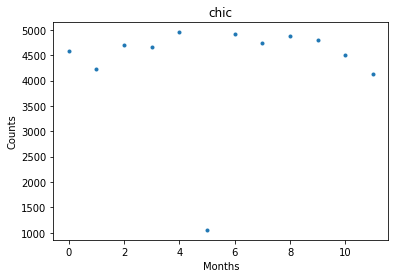

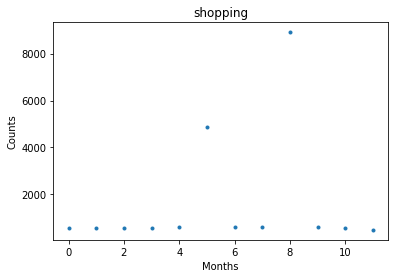

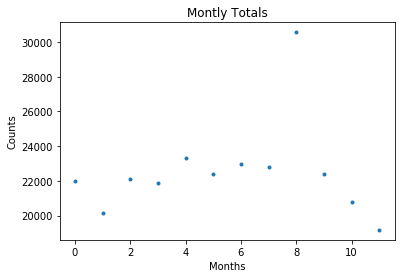

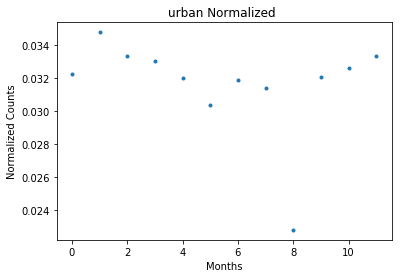

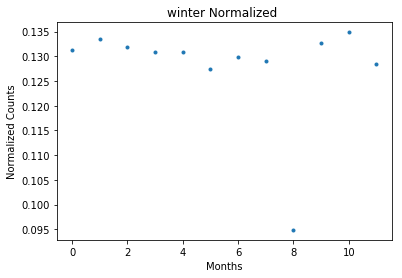

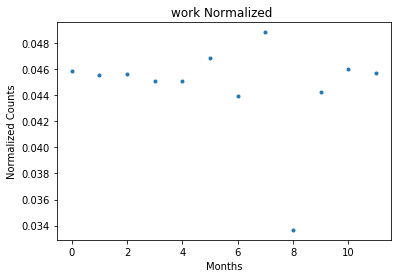

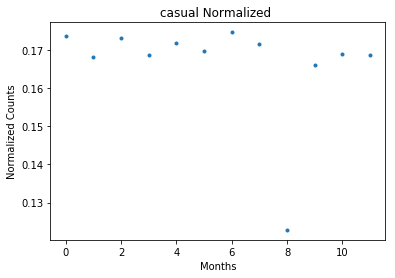

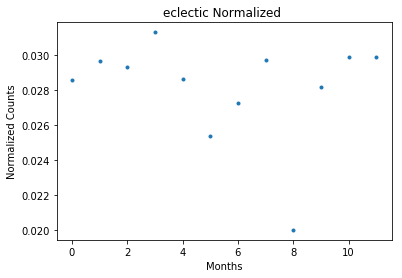

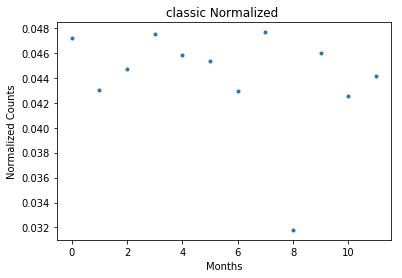

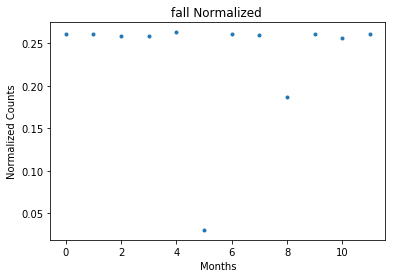

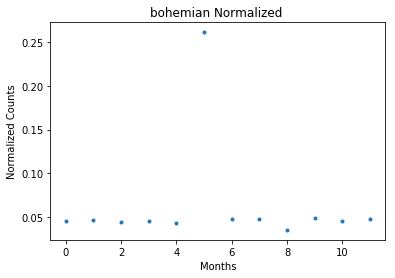

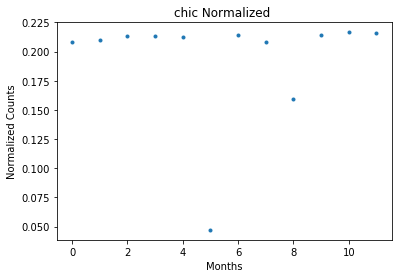

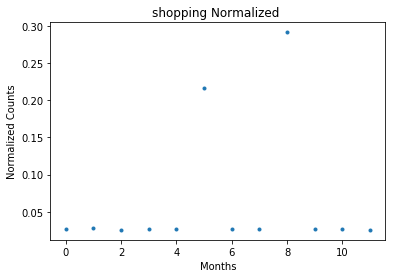

In [33]:
#overall monthly

df['time'] = pd.to_datetime(df['time'])
months = [0,1,2,3,4,5,6,7,8,9,10,11]
months[0] = df[df['time'].dt.month==1]
months[1] = df[df['time'].dt.month==2]
months[2] = df[df['time'].dt.month==3]
months[3] = df[df['time'].dt.month==4]
months[4] = df[df['time'].dt.month==5]
months[5] = df[df['time'].dt.month==6]
months[6] = df[df['time'].dt.month==7]
months[7] = df[df['time'].dt.month==8]
months[8] = df[df['time'].dt.month==9]
months[9] = df[df['time'].dt.month==10]
months[10] = df[df['time'].dt.month==11]
months[11] = df[df['time'].dt.month==12]


for i in range(0,12):
    months[i] = getStyles(months[i])
        
months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
months_Styles = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in range (0,12):
    months_Styles[i], months_Counts[i] = getWordFreq(months[i])
    
months_Counts = np.array(months_Counts).astype(float)
months_Styles = np.array(months_Styles)

for i in range(0,10):
    plt.plot(months_Counts[0:12,i], linestyle = '', marker = '.')
    plt.title(months_Styles[0,i])
    plt.xlabel('Months')
    plt.ylabel("Counts")
    plt.show()
    
monthTotal = []
for j in range(0,12):
    monthTotal.append(sum(months_Counts[j,0:10]))
plt.plot(monthTotal, linestyle = '', marker = '.')
plt.xlabel('Months')
plt.ylabel("Counts")
plt.title('Montly Totals')
plt.show()

months_CountsNorm = months_Counts
for i in range(0,12):
    for j in range(0,10):
        months_CountsNorm[i,j] = months_Counts[i,j]/monthTotal[i]
    
for i in range(0,10):
    plt.plot(months_CountsNorm[0:12,i], linestyle = '', marker = '.')
    plt.title(months_Styles[0,i] + ' Normalized ')
    plt.xlabel('Months')
    plt.ylabel("Normalized Counts")
    plt.show()
    
    
#plotMonths(df, 'total')
#plotMonthsNorm(df, 'total')

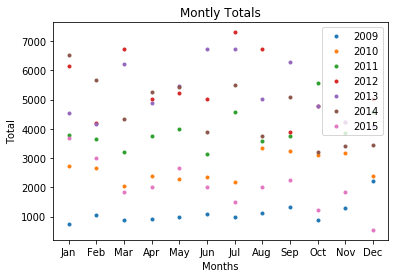

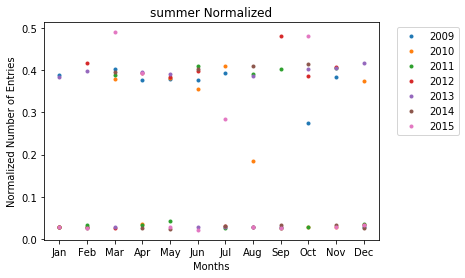

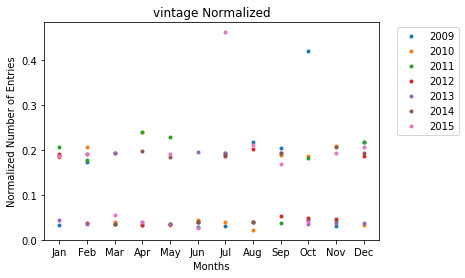

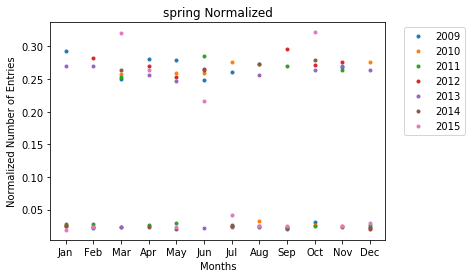

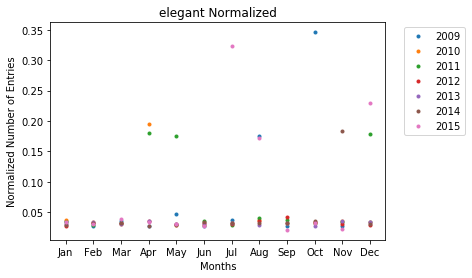

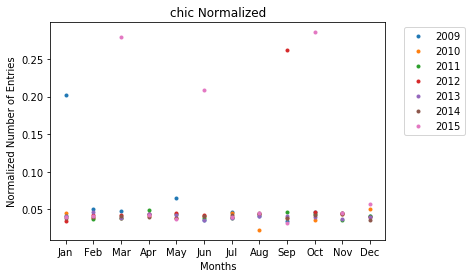

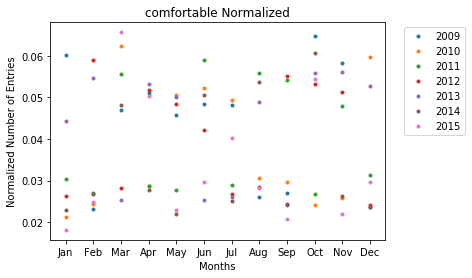

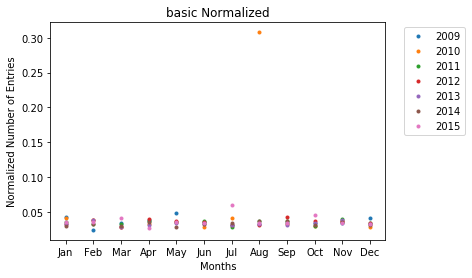

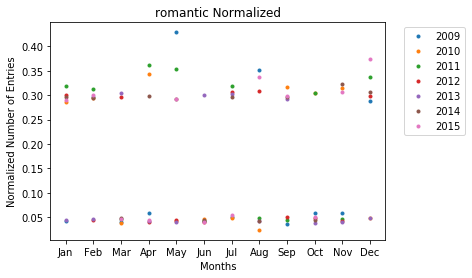

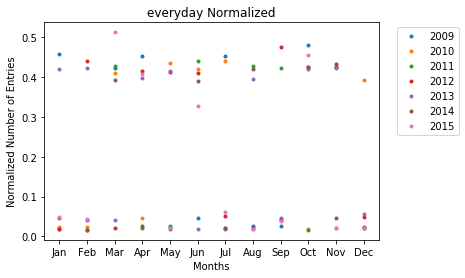

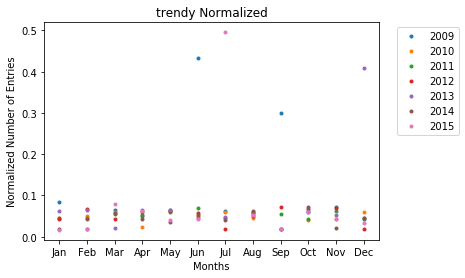

In [34]:
#create dataframes for each year:

def plotTrends(dataframe):
    
    dataframe['time'] = pd.to_datetime(dataframe['time'])

    data_2008 = dataframe[(dataframe['time'] < '2009-01-01')]
    data_2009 = dataframe[(dataframe['time'] >= '2009-01-01') & (dataframe['time'] < '2010-01-01')]
    data_2010 = dataframe[(dataframe['time'] >= '2010-01-01') & (dataframe['time'] < '2011-01-01')]
    data_2011 = dataframe[(dataframe['time'] >= '2011-01-01') & (dataframe['time'] < '2012-01-01')]
    data_2012 = dataframe[(dataframe['time'] >= '2012-01-01') & (dataframe['time'] < '2013-01-01')]
    data_2013 = dataframe[(dataframe['time'] >= '2013-01-01') & (dataframe['time'] < '2014-01-01')]
    data_2014 = dataframe[(dataframe['time'] >= '2014-01-01') & (dataframe['time'] < '2015-01-01')]
    data_2015 = dataframe[(dataframe['time'] >= '2015-01-01')]
    
    months2009 = [g for n, g in data_2009.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2009[i] = getStyles(months2009[i])
    months2010 = [g for n, g in data_2010.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2010[i] = getStyles(months2010[i])
    months2011 = [g for n, g in data_2011.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2011[i] = getStyles(months2011[i])
    months2012 = [g for n, g in data_2012.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2012[i] = getStyles(months2012[i])
    months2013 = [g for n, g in data_2013.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2013[i] = getStyles(months2013[i])
    months2014 = [g for n, g in data_2014.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2014[i] = getStyles(months2014[i])
    months2015 = [g for n, g in data_2015.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2015[i] = getStyles(months2015[i])
        
    months_Counts2009 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2009 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2010 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2010 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2011 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2011 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2012 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2012 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2013 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2013 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2014 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2014 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2015 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles2015 = [0,1,2,3,4,5,6,7,8,9,10,11]

    
    for i in range (0,12):
        months_Styles2009[i], months_Counts2009[i] = getWordFreq(months2009[i])
        months_Styles2010[i], months_Counts2010[i] = getWordFreq(months2010[i])
        months_Styles2011[i], months_Counts2011[i] = getWordFreq(months2011[i])
        months_Styles2012[i], months_Counts2012[i] = getWordFreq(months2012[i])
        months_Styles2013[i], months_Counts2013[i] = getWordFreq(months2013[i])
        months_Styles2014[i], months_Counts2014[i] = getWordFreq(months2014[i])
        months_Styles2015[i], months_Counts2015[i] = getWordFreq(months2015[i])
       
    months_Counts2009 = np.array(months_Counts2009).astype(float)
    months_Styles2009 = np.array(months_Styles2009)
    months_Counts2010 = np.array(months_Counts2010).astype(float)
    months_Styles2010 = np.array(months_Styles2010)
    months_Counts2011 = np.array(months_Counts2011).astype(float)
    months_Styles2011 = np.array(months_Styles2011)
    months_Counts2012 = np.array(months_Counts2012).astype(float)
    months_Styles2012 = np.array(months_Styles2012)
    months_Counts2013 = np.array(months_Counts2013).astype(float)
    months_Styles2013 = np.array(months_Styles2013)
    months_Counts2014 = np.array(months_Counts2014).astype(float)
    months_Styles2014 = np.array(months_Styles2014)
    months_Counts2015 = np.array(months_Counts2015).astype(float)
    months_Styles2015 = np.array(months_Styles2015)
    
    monthTotal2009 = []
    monthTotal2010 = []
    monthTotal2011 = []
    monthTotal2012 = []
    monthTotal2013 = []
    monthTotal2014 = []
    monthTotal2015 = []

    
    cmap = plt.get_cmap('tab10')
    for j in range(0,12):
        monthTotal2009.append(sum(months_Counts2009[j,0:10]))
        monthTotal2010.append(sum(months_Counts2010[j,0:10]))
        monthTotal2011.append(sum(months_Counts2011[j,0:10]))
        monthTotal2012.append(sum(months_Counts2012[j,0:10]))
        monthTotal2013.append(sum(months_Counts2013[j,0:10]))
        monthTotal2014.append(sum(months_Counts2014[j,0:10]))
        monthTotal2015.append(sum(months_Counts2015[j,0:10]))

        
    plt.plot(monthTotal2009, linestyle = '', marker = '.', label = '2009')
    plt.plot(monthTotal2010, linestyle = '', marker = '.', label = '2010')
    plt.plot(monthTotal2011, linestyle = '', marker = '.', label = '2011')
    plt.plot(monthTotal2012, linestyle = '', marker = '.', label = '2012')
    plt.plot(monthTotal2013, linestyle = '', marker = '.', label = '2013')
    plt.plot(monthTotal2014, linestyle = '', marker = '.', label = '2014')
    plt.plot(monthTotal2015, linestyle = '', marker = '.', label = '2015')

    plt.title('Montly Totals')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel('Months')
    plt.ylabel('Total')
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.legend()
    plt.show()
    
    months_CountsNorm2009 = months_Counts2009
    months_CountsNorm2010 = months_Counts2010
    months_CountsNorm2011 = months_Counts2011
    months_CountsNorm2012 = months_Counts2012
    months_CountsNorm2013 = months_Counts2013
    months_CountsNorm2014 = months_Counts2014
    months_CountsNorm2015 = months_Counts2015


    for i in range(0,12):
        for j in range(10,20):
            months_CountsNorm2009[i,j] = months_Counts2009[i,j]/monthTotal2009[i]
            months_CountsNorm2010[i,j] = months_Counts2010[i,j]/monthTotal2010[i]
            months_CountsNorm2011[i,j] = months_Counts2011[i,j]/monthTotal2011[i]
            months_CountsNorm2012[i,j] = months_Counts2012[i,j]/monthTotal2012[i]
            months_CountsNorm2013[i,j] = months_Counts2013[i,j]/monthTotal2013[i]
            months_CountsNorm2014[i,j] = months_Counts2014[i,j]/monthTotal2014[i]
            months_CountsNorm2015[i,j] = months_Counts2015[i,j]/monthTotal2015[i]

    
    for i in range(10,20):
        plt.plot(months_CountsNorm2009[0:12,i], linestyle = '', marker = '.', label = '2009', c = cmap(0))
        plt.plot(months_CountsNorm2010[0:12,i], linestyle = '', marker = '.', label = '2010', c = cmap(1))
        plt.plot(months_CountsNorm2011[0:12,i], linestyle = '', marker = '.', label = '2011', c = cmap(2))
        plt.plot(months_CountsNorm2012[0:12,i], linestyle = '', marker = '.', label = '2012', c = cmap(3))
        plt.plot(months_CountsNorm2013[0:12,i], linestyle = '', marker = '.', label = '2013', c = cmap(4))
        plt.plot(months_CountsNorm2014[0:12,i], linestyle = '', marker = '.', label = '2014', c = cmap(5))
        plt.plot(months_CountsNorm2015[0:12,i], linestyle = '', marker = '.', label = '2015', c = cmap(6))
        plt.title(months_Styles2009[0,i] + ' Normalized')
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.xlabel('Months')
        plt.ylabel('Normalized Number of Entries')
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
        plt.show()
    
    


plotTrends(df)


In [ ]:
def getWordFreq(words):
    styleCounts = dict(Counter(words.split()).most_common(20))
    styleUnique, styleCounts = zip(*styleCounts.items())
    return styleUnique, styleCounts

from bokeh.io import output_notebook
from bokeh.layouts import row, column, widgetbox
from bokeh.models import ColumnDataSource, CustomJS
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure, show

output_notebook()

# Set up data
N = 200
x, y = getWordFreq(styles2008)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = figure(plot_height=400, plot_width=400, title="Popular Styles Over Time",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=x, y_range=[0, 6000])
plot.vbar('x', top = 'y', source=source, width=0.5)


# Set up widgets
text = TextInput(title="title", value='date')
slider = Slider(title="date", value=2008, start=2008, end=2015, step=1)

# Set up callbacks
def update_title(attrname, old, new):
    plot.title.text = text.value

text.on_change('value', update_title)

update_data = CustomJS(args=dict(source=source, slider=slider), code = """
    var data = source.data;
    var f = slider.value;
    x, y = getWordFreq(styles+f)
    source.change.emit();
""")

for w in [date]:
    w.js_on_change('value', update_data)

# Set up layouts and add to document
inputs = widgetbox(text, date)
layout = row(plot,widgetbox(text, date))

#curdoc().add_root(row(inputs, layout, width=800))
#curdoc().title = "Sliders"

show(column(slider, plot))